### Traffic flow

In [73]:
import sympy
from sympy import init_printing
import numpy as np
import matplotlib.pyplot as plt
init_printing()
%matplotlib inline

In [229]:
# initial problem parameters:
Vmax = 136     # maximum velocity [km/hr]
L = 11        # length of road [km]
rho_max = 250 # maximum car density [cars/km]

# discretization
nx = 50       # number of x steps
dx = L/(nx-1) # x step
dt = 0.001    # time step [hr]
T = 0.2       # total time [hr]
nt = int(T/dt)# number of time steps

# initial conditions
x = np.linspace(0,L,nx)
rho0 = np.ones(nx)*20
rho0[10:20] = 50
# Boundary condition rho(x = 0,t) = 10

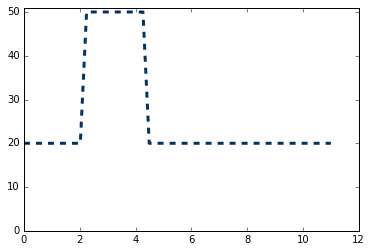

In [230]:
plt.plot(x,rho0,color='#003366', ls='--', lw=3)
plt.ylim(0,51);

In [225]:
# Functions
# Flux:
def flux(rho):
    return Vmax*rho*(1-rho/rho_max)

# Velocity:
def velocity(rho):
    return Vmax*(1-rho/rho_max)

# discretization function
def solve_disc(u):
    return u[1:] - dt/dx*(flux(u[1:])-flux(u[0:-1]))

# for converting time to minutes 
def min_to_hour(t):
    # t = time in minutes you want data
    return int(round((t/60)/dt,0))

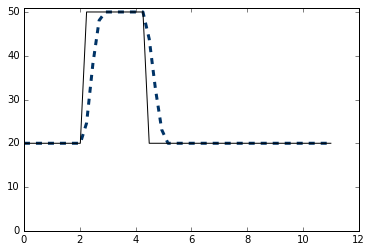

In [232]:
# initiallize solution:
u = np.ndarray(shape=(nt,3,len(rho0))) # multidimensional array for all solution 
                                       # data, each row is a different time step
                                       # the columns are for rho, v, and F
u[0,:,:] = ([rho0, velocity(rho0), flux(rho0)]) # valuse at t=0

# loop for solving discretized equation
for n in range(nt-1):
    u[n+1,0,0] = 20 # boundary condition
    u[n+1, 0, 1:] = solve_disc(u[n,0,:]) 
    u[n+1, 1, :] = velocity(u[n+1,0,:])
    u[n+1, 2, :] = flux(u[n+1, 0, :])

plt.plot(x,u[3,0,:],color='#003366', ls='--', lw=3)
plt.plot(x,u[0,0,:],color='k', lw=1)
plt.ylim(0, 51);

In [233]:
# minimum velocity at t = 0 in [m/s]
print('Minimum velocity at (t = 0): %.2f [m/s]'\
      % (np.min(u[min_to_hour(0),1,:])*(1000/3600)))

Minimum velocity at (t = 0): 30.22 [m/s]


In [234]:
# average velocity at t = 3 min in [m/s]
print('Average velocity at (t = 3 minutes): %.2f [m/s]'\
      % (np.mean(u[min_to_hour(3),1,:])*(1000/3600)))

Average velocity at (t = 3 minutes): 33.86 [m/s]


In [228]:
# average velocity at t = 3 min in [m/s]
print('Minumum velocity at (t = 6 minutes): %.2f [m/s]'\
      % (np.min(u[min_to_hour(6),1,:])*(1000/3600)))

Minumum velocity at (t = 6 minutes): 18.78 [m/s]
